the slope is 5.864784559099437
the intercept is 37.154171097560976


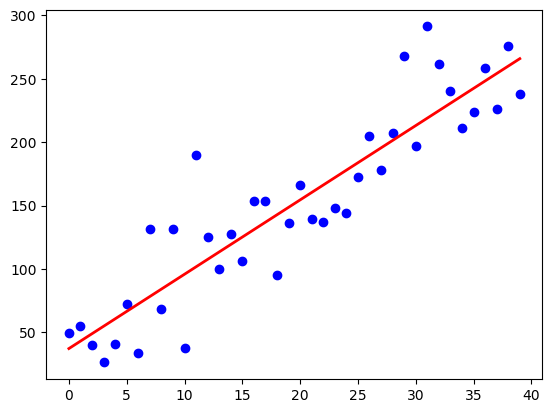

In [14]:
# read in data.vs.txt into 3 arrays
# fit data and ignore error points
# plot data and fit 
# print fit parameters

# import important packages to jupyter notebook
import numpy as np
import matplotlib.pyplot as plt

# generates 3 arrays for each column
x = np.genfromtxt('data.v3.txt', usecols=0, dtype=float)
y = np.genfromtxt('data.v3.txt', usecols=1, dtype=float)
dy = np.genfromtxt('data.v3.txt', usecols=2, dtype=float)

# calculates the mean for the x points and the y points
x_avg = np.mean(x)
y_avg = np.mean(y)

# finds the length of the x array and sets varibles for the numerator and denominator for the slope calculation
n = len(x)
m_num = 0
m_denom = 0

# runs a loop to calculate the numerator and denominator for the slope over all values of x and y
# takes in the size of the array for x, both arrays x and y, and the means for both x and y
for i in range(n):
    m_num = m_num + (x[i] - x_avg) * (y[i] - y_avg)
    m_denom = m_denom + (x[i] - x_avg)**2

# calculates the slope by dividing the numerator and the denominator calcuated above
m = m_num/m_denom

# calculates the intercept by taking in the means of x and y as well as the slope
c = y_avg - (m * x_avg)

# prints the slope and the intercept
print('the slope is',m)
print('the intercept is',c)

# plots the x and y coordinates and generates a fit from the calculated slope and intercept
plt.scatter(x,y, color = 'blue')
plt.plot(x, m*x+c, color='red', linestyle='-', linewidth=2)
plt.show()

In [18]:
# calculates the chi square factor by subtracting the y points from the fit then dividing by the uncertainty on y
# then summing all of that together
chisqr = sum((y-(m*x+c))**2/dy**2)

# calculates the degrees of freedom by taking in the length of the y array 
dof = len(y) - 1

# takes in the chi square and degrees of freedom to calculate the reduced chi square
chisqr_red = chisqr/dof

# prints the calculated reduced chi square value
print(f'Reduced chi^2 = {chisqr_red}')

39
Reduced chi^2 = 1.1568088806402623


the slope is 5.864784559099435
the constant is 37.15417109756102


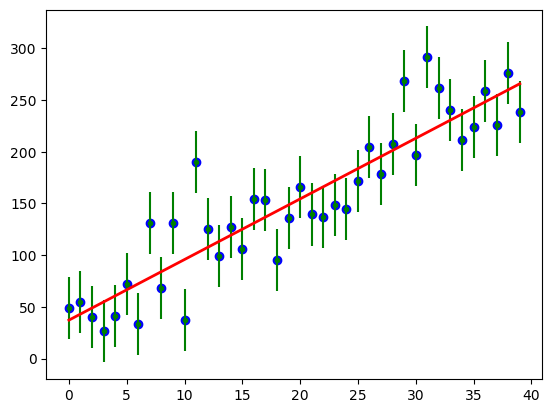

In [61]:
# fit line using uncertainties
# plot fit using error bars 
# print parameters

# calculates the mean for the x points and the y points
x_avg = np.mean(x)
y_avg = np.mean(y)

# finds the length of the x array and sets varibles for the numerator and denominator for the slope calculation
n = len(x)
m_num = 0
m_denom = 0

# calculates the standard deviation of y with the uncertainty on y
sy = np.sum(y/dy**2)

# runs a loop to calculate the numerator and denominator for the slope over all values of x and y
# takes in the size of the array for x, both arrays x and y, the means for both x and y, and the standard deviation of y
for i in range(n):
    m_num = m_num + ((x[i] - x_avg)) * ((y[i] - y_avg) - sy)
    m_denom = m_denom + ((x[i] - x_avg)**2)

# calculates the slope by dividing the numerator and the denominator calcuated above
m = (m_num)/m_denom 

# calculates the intercept by taking in the means of x and y as well as the slope
c = y_avg - (m * x_avg)

# prints the slope and the intercept
print('the slope is',m)
print('the constant is',c)

# generates error bars for the y points using given values for the error of y
plt.errorbar(x,y,yerr=dy,fmt='g.')

# plots x and y as a scatter plot
plt.scatter(x,y, color = 'blue')

# generates a fit from the calculated slope and intercept
plt.plot(x, m*x+c, color='red', linestyle='-', linewidth=2)
plt.show()

In [62]:
# calculates the chi square factor by subtracting the y points from the fit then dividing by the uncertainty on y
# then summing all of that together
chisqr = sum((y-(m*x+c))**2/dy**2)

# calculates the degrees of freedom by taking in the length of the y array 
dof = len(y) - 2

# takes in the chi square and degrees of freedom to calculate the reduced chi square
chisqr_red = chisqr/dof

# prints the calculated reduced chi square value
print(f'Reduced chi^2 = {chisqr_red}')

Reduced chi^2 = 1.1872512196044798


In [2]:
# subroutine that takes in x, y, and dy
# outputs a fit line

def DataFit(x,y,dy):
    '''
    Generates a linear fit by determining the slope and y-intercept of an imported data set.

    Input: X Axis Data(x), Y Axis Data(y), Error On Y-Axis(dy)

    Output: Linear Fit (fit)
    '''
    
    # initializes slope variables
    m_num = 0
    m_denom = 0
    
    # equations for variables used in slope/intercept calculations
    n = len(x)
    x_avg = np.mean(x)
    y_avg = np.mean(y)
    sy = np.sum(y/dy**2)

    # loop to generate numerator and denominator values for the slope calculation
    for i in range(n):
        m_num = m_num + ((x[i] - x_avg)) * ((y[i] - y_avg) - sy)
        m_denom = m_denom + ((x[i] - x_avg)**2)
    
    # equations for slope and intercept
    m = m_num/m_denom
    c = y_avg - (m * x_avg)

    # linear fit equation taking in the slope, intercept, and x values
    fit = m*x+c
    return fit

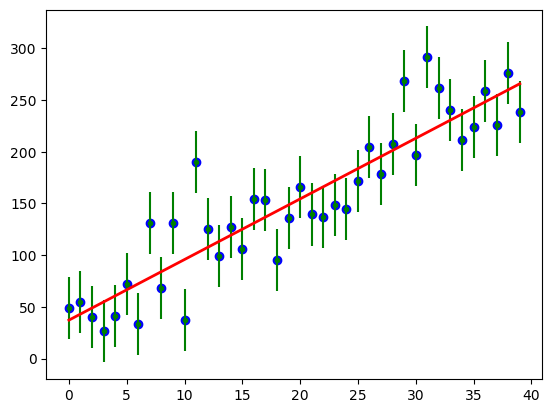

In [3]:
# run subroutine to generate a fit for plotting

# imports important packages
import numpy as np
import matplotlib.pyplot as plt

# reads and imports columns of data from file into 3 arrays
x = np.genfromtxt('data.v3.txt', usecols=0, dtype=float)
y = np.genfromtxt('data.v3.txt', usecols=1, dtype=float)
dy = np.genfromtxt('data.v3.txt', usecols=2, dtype=float)

# plots x and y values as a scatter plot with error bars and a fit line generated by a subroutine
plt.errorbar(x,y,yerr=dy,fmt='g.')
plt.scatter(x,y, color = 'blue')
plt.plot(x, DataFit(x,y,dy), color='red', linestyle='-', linewidth=2)
plt.show()

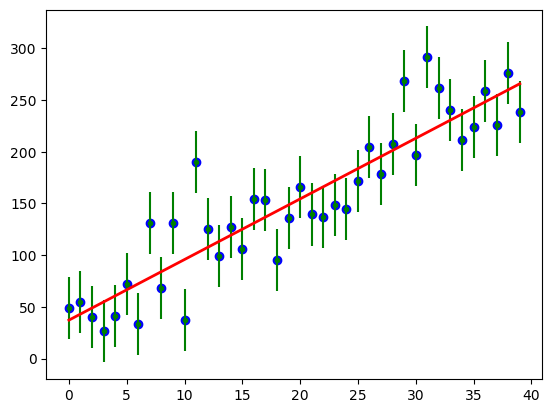

In [4]:
# run an external subroutine to generate a fit for plotting

from DataFitFunc import Fit

# reads and imports columns of data from file into 3 arrays
x = np.genfromtxt('data.v3.txt', usecols=0, dtype=float)
y = np.genfromtxt('data.v3.txt', usecols=1, dtype=float)
dy = np.genfromtxt('data.v3.txt', usecols=2, dtype=float)

# plots x and y values as a scatter plot with error bars and a fit line generated by a subroutine
plt.errorbar(x,y,yerr=dy,fmt='g.')
plt.scatter(x,y, color = 'blue')
plt.plot(x, Fit(x,y,dy), color='red', linestyle='-', linewidth=2)
plt.show()